# Problem Statement - Credit Card Defualt Status
# Predictive Modeling - Linear Discriminant Analysis

In [1]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Set the working directory

In [2]:
#os.chdir('C:\\GL Class\Solution Preparation\Logistic Regression - Python')

# Import Excel file

Load the Data file into Python DataFrame using pandas read_csv method

Ensure that data set loaded do not have any unicode character 

In [32]:
data_df = pd.read_csv("trucks.csv")

# View Top 10 rows

head function is used to view the top records. The number records to be view need to be  given in the parenthesis.

In [3]:
data_df.head(10)

,Unnamed: 0,Freq,period,parked,light,collision
0,1,712,0,1,1,0
1,2,613,1,1,1,0
2,3,192,0,1,1,1
3,4,179,1,1,1,1
4,5,2557,0,0,1,0
5,6,2373,1,0,1,0
6,7,10749,0,0,1,1
7,8,9768,1,0,1,1
8,9,634,0,1,0,0
9,10,411,1,1,0,0


In [4]:
data_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Some more basic commands

tail function is used to view the last records. The number records to be view need to be given in the parenthesis.

In [5]:
data_df.tail(20)

,Freq,period,parked,light,collision
4,2557,0,0,1,0
5,2373,1,0,1,0
6,10749,0,0,1,1
7,9768,1,0,1,1
8,634,0,1,0,0
9,411,1,1,0,0
10,95,0,1,0,1
11,55,1,1,0,1
12,325,0,0,0,0
13,283,1,0,0,0


In [6]:
data_df.describe()

,Freq,period,parked,light,collision
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1448.916667,0.500000,0.500000,0.333333,0.500000
std,2794.132578,0.510754,0.510754,0.481543,0.510754
min,39.000000,0.000000,0.000000,0.000000,0.000000
25%,188.750000,0.000000,0.000000,0.000000,0.000000
50%,536.500000,0.500000,0.500000,0.000000,0.500000
75%,994.750000,1.000000,1.000000,1.000000,1.000000
max,10749.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data_df.dtypes

Freq         int64
period       int64
parked       int64
light        int64
collision    int64
dtype: object

In [8]:
type(data_df)

pandas.core.frame.DataFrame

# Check for missing values

In [9]:
data_df.isnull().sum()

Freq         0
period       0
parked       0
light        0
collision    0
dtype: int64

No Missing values

In [10]:
data_df.shape ### 781 rows and 11 features

(24, 5)

# Convert Own House into object

In [10]:
data_df['Own house']=data_df['Own house'].astype('object')

# Find out unique values in each categorical column



In [11]:
data_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
data_df['Job'].unique()

array(['unskilled', 'skilled', 'Management'], dtype=object)

In [13]:
data_df['Status'].unique() ### No means No Default

array(['No', 'Default'], dtype=object)

In [14]:
data_df['Credit.History'].unique()

array(['poor', 'critical', 'good', 'very good', 'verygood', 'Poor'],
      dtype=object)

In [15]:
data_df['Own house'].unique()

array([1, 0], dtype=object)

In [17]:
data_df['Purpose'].unique()

array(['personal', 'car', 'education', 'consumer.durable'], dtype=object)

In [16]:
data_df.dtypes

Gender             object
Loan.Offered        int64
Job                object
Work.Exp            int64
Credit.Score        int64
EMI.Ratio         float64
Status             object
Credit.History     object
Own house          object
Purpose            object
Dependents          int64
dtype: object

# Clean the dataset -- Correction in the values

In [17]:
data_df['Credit.History']=np.where(data_df['Credit.History'] =='very good', 'verygood', data_df['Credit.History'])

In [18]:
data_df['Credit.History']=np.where(data_df['Credit.History'] =='Poor', 'poor', data_df['Credit.History'])

In [19]:
data_df['Credit.History'].unique()

array(['poor', 'critical', 'good', 'verygood'], dtype=object)

# Count of Default and No Default in the Target Column

In [21]:
data_df['Status'].value_counts()

No         656
Default    125
Name: Status, dtype: int64

# Univariate Plots


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


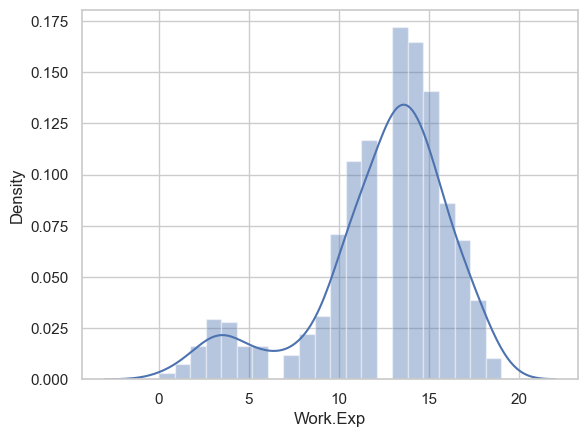

In [22]:
sns.distplot(data_df['Work.Exp']);
plt.show(); ### Not required in this version, inserted just to show that if graph is not printing then this is required

# Bivariate Analysis 


Bivariate shown below is only as a sample.. Reader is adviced to perform complete data exploration process

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


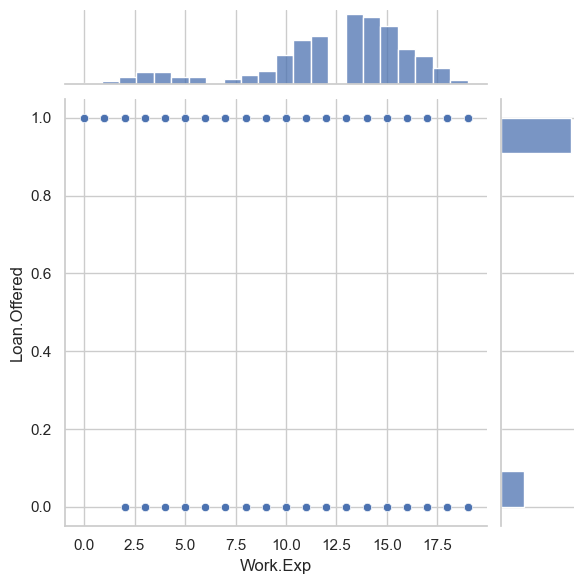

In [23]:
sns.jointplot(data_df['Work.Exp'], data_df['Loan.Offered']) ### annotate function of stats is to print correlation value

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='Work.Exp'>

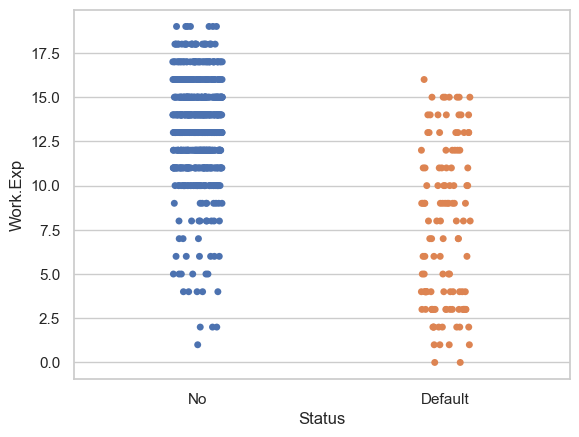

In [24]:
sns.stripplot(data_df['Status'], data_df['Work.Exp']) ### Concentration of observations

Lower Work Experience have more concentration of Default.. Reader is adviced to perform more analysis and generate insight.

# Find the Distribution of Dependent Variable Categories


In [29]:
count_no_sub = len(data_df[data_df['collision']=='1'])
count_sub = len(data_df[data_df['collision']=='0'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Default is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Default", pct_of_sub*100)

ZeroDivisionError: division by zero

In [33]:
count_collision_0 = len(data_df[data_df['collision']=='0'])
count_collision_1 = len(data_df[data_df['collision']=='1'])

In [34]:
print(count_collision_0, count_collision_0)

0 0


In [35]:
data_df['collision'].value_counts()

0    12
1    12
Name: collision, dtype: int64

Distribution is not biased and hence no need to use SMOTE or any other package to balance binary classes

Text(0, 0.5, 'Status')

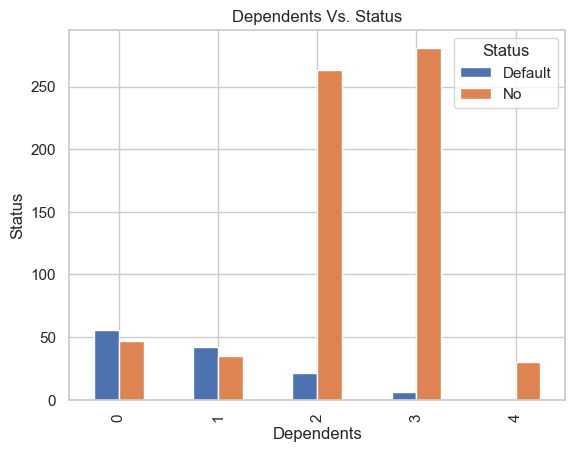

In [26]:
pd.crosstab(data_df.Dependents,data_df.Status).plot(kind='bar')
plt.title('Dependents Vs. Status')
plt.xlabel('Dependents')
plt.ylabel('Status')

Below commands are only done as a good practice.. Not mandatory

In [32]:
data_df.rename(columns = {'Own house':'Ownhouse'}, inplace = True) 
data_df.rename(columns = {'Loan.Offered':'LoanOffered'}, inplace = True) 
data_df.rename(columns = {'Work.Exp':'WorkExp'}, inplace = True) 
data_df.rename(columns = {'Credit.Score':'CreditScore'}, inplace = True) 
data_df.rename(columns = {'EMI.Ratio':'EMIRatio'}, inplace = True) 
data_df.rename(columns = {'Credit.History':'CreditHistory'}, inplace = True) 


In [33]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         781 non-null    object 
 1   LoanOffered    781 non-null    int64  
 2   Job            781 non-null    object 
 3   WorkExp        781 non-null    int64  
 4   CreditScore    781 non-null    int64  
 5   EMIRatio       781 non-null    float64
 6   Status         781 non-null    object 
 7   CreditHistory  781 non-null    object 
 8   Ownhouse       781 non-null    object 
 9   Purpose        781 non-null    object 
 10  Dependents     781 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 67.2+ KB


# Convert Object Feature types for Linear Discriminant Analysis

In [34]:
data_df['Gender']=np.where(data_df['Gender'] =='Male', 1, data_df['Gender'])
data_df['Gender']=np.where(data_df['Gender'] =='Female', 0, data_df['Gender'])

In [35]:
data_df['Job']=np.where(data_df['Job'] =='Management', 1, data_df['Job'])
data_df['Job']=np.where(data_df['Job'] =='unskilled', 0, data_df['Job'])
data_df['Job']=np.where(data_df['Job'] =='skilled', 2, data_df['Job'])

In [36]:
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='critical', 1, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='poor', 0, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='good', 2, data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='verygood', 3, data_df['CreditHistory'])

In [37]:
data_df['Purpose']=np.where(data_df['Purpose'] =='personal', 1, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='car', 0, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='education', 2, data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='consumer.durable', 3, data_df['Purpose'])


In [38]:
data_df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,1,0,0,14,86,3.0,No,0,1,1,2
1,0,1,2,15,94,3.0,No,0,1,1,3
2,1,0,0,16,86,3.0,No,0,1,1,2
3,0,1,2,13,94,3.0,No,0,1,1,3
4,1,1,2,12,85,3.3,No,0,1,1,2


In [11]:
#Scaling the data which is a pre-requisite for LDA 
scaler=StandardScaler()
X = scaler.fit_transform(data_df.drop(['collision'],axis=1))
Y = data_df['collision']

In [12]:
Y.value_counts()

0    12
1    12
Name: collision, dtype: int64

In [13]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

LinearDiscriminantAnalysis()

In [14]:
# Predict it
pred_class = model.predict(X)
data_df['Prediction'] = pred_class 


In [44]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= data_df[['Gender','LoanOffered','Job','WorkExp','CreditScore','EMIRatio','CreditHistory','Ownhouse','Purpose','Dependents']]
Cor1 = data.corr()
Cor1

,LoanOffered,WorkExp,CreditScore,EMIRatio,Dependents
LoanOffered,1.000000,-0.076224,-0.082435,0.057273,-0.029145
WorkExp,-0.076224,1.000000,0.915575,-0.300286,0.408753
CreditScore,-0.082435,0.915575,1.000000,-0.382192,0.490798
EMIRatio,0.057273,-0.300286,-0.382192,1.000000,-0.251782
Dependents,-0.029145,0.408753,0.490798,-0.251782,1.000000


In [15]:
#generate Confusion Matrix
# Please refer for confusion matrix http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(Y, pred_class)


array([[8, 4],
       [6, 6]], dtype=int64)

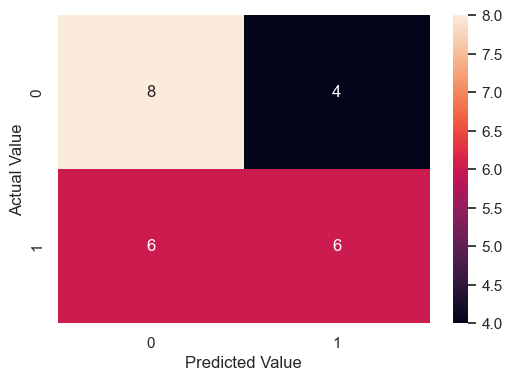

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

### 146 rows classified as 0 (Default) and 635 rows classified as 1 (Not Default)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



In [18]:
X.shape

(24, 4)

In [19]:
model.coef_

array([[ 0.86384211,  0.02950213,  0.36547381, -0.43411123]])

In [20]:
model.intercept_

array([0.])

### LDF for the above model will be

In [51]:
'''
LDF=9.159+ X1*1.137 + X2*(-0.463) + X3*(0.833) + X4*(-1.083) + X5*3.803 + X6*(-0.531) + X7*0.361 + X8*5.959 + X9*0.144 + X10*2.30
'''

'\nLDF=9.159+ X1*1.137 + X2*(-0.463) + X3*(0.833) + X4*(-1.083) + X5*3.803 + X6*(-0.531) + X7*0.361 + X8*5.959 + X9*0.144 + X10*2.30\n'

### So from the above equation the following things can be summarized as

- the coeff of X8 predictor is largest in magnitude thus it helps in discriminating the target the best 
- the coeff of X2 predictor is smallest in magnitude thus it helps in discriminating the target the least.
- all the DS can be computed for each row using the above f(x) which will aid in classification

## Classification by Discriminant Score

In [21]:
#Computation of Discriminant Scores/LDF for each row of data


DS=[]
coef=[1.137129  , -0.46395456,  0.83372221, -1.08383805,  3.80345376,
        -0.53102867,  0.36191579,  5.95912536,  0.14435512,  2.30379498] # Coefficients 
for p in range(len(X)):
    s3=0
    for q in range(X.shape[1]):
        s3=s3+(X[p,q]*coef[q]) # Building the LDF equation 
    s3=s3+9.159
    DS.append(s3)
    
    

In [22]:
'''
Classification Rule :

if LDF>=0 then Classify as 1 
else if LDF <0 then Classify as 0 
'''


s1=0
s2=0
for i in range(len(X)):
    if DS[i]>=0:
        print("FOR Row:",i," ",X[i,:])
        print()
        #print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">0.5 is True}")
        print("-->","{ DS: ",DS[i],">=0 , Classify as 1}")
        print("------------------------------------------------------------------------------------------")
        s1+=1
    elif DS[i]<0:
        print("FOR Row:",i," ",X[i,:])
        print()
        #print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">0.5 is True}")
        print("-->","{ DS: ",DS[i],"<0 , Classify as 0}")
        print("------------------------------------------------------------------------------------------")
        s2+=1



FOR Row: 0   [-0.2694096  -1.          1.          1.41421356]

--> { DS:  8.61754482715852 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1   [-0.30560305  1.          1.          1.41421356]

--> { DS:  7.648479094463599 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 2   [-0.45951657 -1.          1.          1.41421356]

--> { DS:  8.401368679670048 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 3   [-0.46426925  1.          1.          1.41421356]

--> { DS:  7.468055155982837 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 4   [ 0.40510455 -1.         -1.          1.41421356]

--> { DS:  7.717110007382036 >=0 , Classify as 1}
-------------------------------------------------------------------

In [23]:
print(s1," rows classified as 1 (Not Default) ")
print(s2," rows classified as 0 (Default) ")

24  rows classified as 1 (Not Default) 
0  rows classified as 0 (Default) 


## Classification by Probability 

In [24]:
pred_prob=model.predict_proba(X)#Posterior Probability for each row

In [25]:
pred_prob[:,1]

array([0.37503374, 0.38155746, 0.33739961, 0.34978023, 0.34097427,
       0.34117537, 0.87304772, 0.84255614, 0.59521676, 0.59246188,
       0.55363067, 0.56505977, 0.39103596, 0.40198056, 0.46283408,
       0.45638919, 0.57304954, 0.57465851, 0.54980338, 0.5638175 ,
       0.41029564, 0.41809875, 0.44420787, 0.44840914])

In [26]:
'''
Classification Rule :

if prob(Y=1|X) >=0 then Classify as 1 
else ifprob(Y=1|X) <0 then Classify as 0 
'''


s3,s4=0,0
for i in range(len(pred_prob[:,1])):
    if pred_prob[:,1][i]>=0.5:
        print("FOR Row:",i," ",X[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">=0.5 , Classify as 1 }")
        print("------------------------------------------------------------------------------------------")
        s3+=1
    elif pred_prob[:,1][i]<0.5:
        print("FOR Row:",i," ",X[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],"< 0.5 , Classify as 0 }")
        print("------------------------------------------------------------------------------------------")
        s4+=1

  

FOR Row: 0   [-0.2694096  -1.          1.          1.41421356]

--> { prob(Y=1|X) = 0.3750337377535376 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1   [-0.30560305  1.          1.          1.41421356]

--> { prob(Y=1|X) = 0.38155746000857094 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 2   [-0.45951657 -1.          1.          1.41421356]

--> { prob(Y=1|X) = 0.337399605478587 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 3   [-0.46426925  1.          1.          1.41421356]

--> { prob(Y=1|X) = 0.34978022865925235 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 4   [ 0.40510455 -1.         -1.          1.41421356]

--> { prob(Y=1|X) = 0.3409742689877536 < 0.5 , Classify as 0 }


In [27]:
print(s3," rows classified as 1 (Not Default) ")
print(s4," rows classified as 0 (Default) ")

10  rows classified as 1 (Not Default) 
14  rows classified as 0 (Default) 
